# Bitcoin Blockchain Transactions Analysis

In [74]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt

In [2]:
path = 'data/'
files = [ i for i in os.listdir(path) if i.endswith('.csv')]

In [8]:
blocks = []
for i in files:
    blocks.append(pd.read_csv(path + files[0]).drop(columns = ['Unnamed: 0']))

In [9]:
blocks_df = pd.concat(blocks)

In [11]:
blocks_df.shape

(21156300, 29)

In [73]:
blocks_df.head()

,input_version,input_count,input_previous_hash,input_out_id,input_script_length,input_script_signature_raw,input_script_signature,input_seq_no,output_version,output_count,...,block_hash,block_datetime,block_timestamp,block_bits,block_nonce,block_transactions_count,block_date,block_time,block_size_MB,block_hour
0,1,1,b'00000000000000000000000000000000000000000000...,b'ffffffff',85,b'037ac50a04769770612f2ffabe6d6dd42d77b302a018...,b'037ac50a04769770612f2ffabe6d6dd42d77b302a018...,b'ffffffff',1,4,...,b'cf43350ae1764f1be09f999850cb1662b80c551f28c2...,20.10.2021 17:25,1634768756,386794504,3936647432,4652,2021-10-20,17:25:00,1.451943,17
1,1,2,b'2e0037aa4d7281abf72461f7eafa9b5ca5ae36c3e938...,b'00000022',0,b'',b'',b'fffffffd',1,2,...,b'cf43350ae1764f1be09f999850cb1662b80c551f28c2...,20.10.2021 17:25,1634768756,386794504,3936647432,4652,2021-10-20,17:25:00,1.451943,17
2,1,2,b'52ff18efe24832ddc25f14f6ef3e971288762ef94514...,b'00000000',0,b'',b'',b'fffffffd',1,2,...,b'cf43350ae1764f1be09f999850cb1662b80c551f28c2...,20.10.2021 17:25,1634768756,386794504,3936647432,4652,2021-10-20,17:25:00,1.451943,17
3,2,1,b'af78b46dc6f4582a4975d7476a5dbdd9846fbe66418f...,b'00000004',0,b'',b'',b'fffffffd',2,3,...,b'cf43350ae1764f1be09f999850cb1662b80c551f28c2...,20.10.2021 17:25,1634768756,386794504,3936647432,4652,2021-10-20,17:25:00,1.451943,17
4,2,1,b'1d5d7762e9f2b460ff1a2fb544472902bfc8b747650f...,b'00000005',0,b'',b'',b'fffffffd',2,7,...,b'cf43350ae1764f1be09f999850cb1662b80c551f28c2...,20.10.2021 17:25,1634768756,386794504,3936647432,4652,2021-10-20,17:25:00,1.451943,17


In [90]:
blocks_df.columns

Index(['input_version', 'input_count', 'input_previous_hash', 'input_out_id',
       'input_script_length', 'input_script_signature_raw',
       'input_script_signature', 'input_seq_no', 'output_version',
       'output_count', 'output_value', 'output_script_length',
       'output_script_signature_raw', 'output_script_signature',
       'output_address', 'lock_time_block_height', 'time_stamp',
       'witness_item', 'hash_transaction', 'version', 'magic_number',
       'block_size', 'merkle_hash', 'block_hash', 'block_datetime',
       'block_timestamp', 'block_bits', 'block_nonce',
       'block_transactions_count', 'block_date', 'block_time', 'block_size_MB',
       'block_hour'],
      dtype='object')

In [ ]:
blocks_df = blocks_df.rename(columns = {'block_time':'block_datetime'})
blocks_df['block_date'] = pd.to_datetime(blocks_df['block_datetime']).dt.date
blocks_df['block_time'] = pd.to_datetime(blocks_df['block_datetime']).dt.time
blocks_df['block_size_MB'] = blocks_df['block_size']/10**6
blocks_df['block_hour'] = blocks_df['block_time'].apply(lambda i:i.hour)

In [35]:
size = blocks_df[['block_size','block_time']]
size = size.drop_duplicates()
size = size.rename(columns = {'block_time':'block_datetime'})
size['block_date'] = pd.to_datetime(size['block_datetime']).dt.date
size['block_time'] = pd.to_datetime(size['block_datetime']).dt.time
size['block_size_MB'] = size['block_size']/10**6
size.head()

,block_size,block_time
0,1451943,20.10.2021 17:25
6267,1199478,20.10.2021 18:22
10570,1314740,20.10.2021 18:18
15380,1328482,20.10.2021 17:23
22865,424,20.10.2021 17:21


In [36]:
print("Average Block Size (MB):",
      str((size['block_size'].sum()/size['block_size'].shape[0])/10**6))

Average Block Size (MB): 1.4636185494505496


In [59]:
size['block_hour'] = size['block_time'].apply(lambda i:i.hour)

<AxesSubplot:xlabel='block_date'>

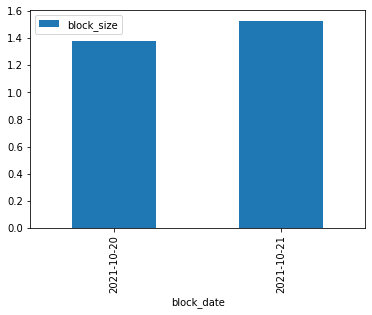

In [84]:
size[['block_size','block_date']].groupby('block_date').mean().plot(kind='bar')

<AxesSubplot:xlabel='block_hour'>

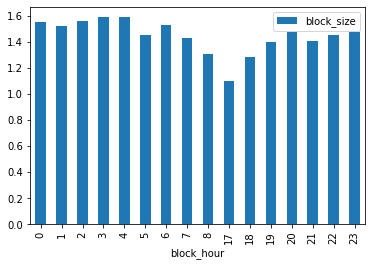

In [70]:
size[['block_size','block_hour']].groupby('block_hour').mean().plot(kind='bar')

In [101]:
trans_value = blocks_df[['output_address','output_value']].groupby('output_address').sum()

In [99]:
trans_value.sort_values('output_value')

,output_value
hash_transaction,
b'f1d2758f0c51bddd7cc0b15ac40861c303e359d6f9868464382d5678e9068ac0',0.000000e+00
b'3d2942afa4c6ff3d800903f84f0bfeeb60bb81fff990fda4b170292c796d2a7a',0.000000e+00
b'd034e9f9e7fdc012ca79d74a97bf803f01ea973d9547bf3acc08a965433bc29e',0.000000e+00
b'239855b61f45eb3d07bdc037414f011bd837d31eaa57a343666222fbd953f762',0.000000e+00
b'eec2de850bb48736a684125222bcf3cd0129695046087817e9890a59b27d9f83',0.000000e+00
...,...
b'7c46aed5c00dce14e21e26b682e2d28eaf5fc9249a84b3541d622a893f11de6e',3.153144e+06
b'41aab41f67539a23ffa3abf1d4560f6be67cde9d66f884a1f7a72c90712f86e4',3.922690e+06
b'bd94b07e2dfaed181e68f92ba0ea41280e346ae0c2db9314cd58e34929365985',5.281604e+06
